In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Input, Dropout, Dense, RepeatVector

from sklearn import metrics
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score,roc_curve, roc_auc_score

from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('./dataset/inflearn_creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0:00:00,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,5.008105,0
1,0:00:00,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.989913,0
2,0:00:24,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,5.936641,0
3,0:00:24,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,4.816249,0
4,0:00:48,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,4.248367,0


In [3]:
df = data.copy()

# Feature selection

In [4]:
df = df[['V14','V17','V12','V10','V4','V11','V1','V16','V9','V28','V7','Amount','V18','V3','V19','V2','V26','V6','V13','V22','Class']]
df

,V14,V17,V12,V10,V4,V11,V1,V16,V9,V28,...,Amount,V18,V3,V19,V2,V26,V6,V13,V22,Class
0,-0.311169,0.207971,-0.617801,0.090794,1.378155,-0.551600,-1.359807,-0.470401,0.363787,-0.021053,...,5.008105,0.025791,2.536347,0.403993,-0.072781,-0.189115,0.462388,-0.991390,0.277838,0
1,-0.143772,-0.114805,1.065235,-0.166974,0.448154,1.612727,1.191857,0.463917,-0.255425,0.014724,...,0.989913,-0.183361,0.166480,-0.145783,0.266151,0.125895,-0.082361,0.489095,-0.638672,0
2,-0.165946,1.109969,0.066084,0.207643,0.379780,0.624501,-1.358354,-2.890083,-1.514654,-0.059752,...,5.936641,-0.121359,1.773209,-2.261857,-1.340163,-0.139097,1.800499,0.717293,0.771679,0
3,-0.287924,-0.684093,0.178228,-0.054952,-0.863291,-0.226487,-0.966272,-1.059647,-1.387024,0.061458,...,4.816249,1.965775,1.792993,-1.232622,-0.185226,-0.221929,1.247203,0.507757,0.005274,0
4,-1.119670,-0.237033,0.538196,0.753074,0.403034,-0.822843,-1.158233,-0.451449,0.817739,0.215153,...,4.248367,-0.038195,1.548718,0.803487,0.877737,0.502292,0.095921,1.345852,0.798278,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,4.626942,1.991691,2.711941,4.356170,-2.066656,-1.593105,-11.881118,1.107641,1.914428,0.823731,...,-0.260067,0.510632,-9.834783,-0.682920,10.071785,0.250034,-2.606837,-0.689256,0.111864,0
284803,-0.675143,-0.025693,0.915802,-0.975926,-0.738589,-0.150189,-0.732789,-0.711757,0.584800,-0.053527,...,3.210481,-1.221179,2.035030,-1.545556,-0.055080,-0.395255,1.058415,1.214756,0.924384,0
284804,-0.510602,0.313502,0.063119,-0.484782,-0.557828,0.411614,1.919565,0.140716,0.432454,-0.026561,...,4.217756,0.395652,-3.249640,-0.577252,-0.301254,-0.087371,3.031260,-0.183699,0.578229,0
284805,0.449624,0.509928,-0.962886,-0.399126,0.689799,-1.933849,-0.240440,-0.608577,0.392087,0.104533,...,2.302685,1.113981,0.702510,2.897849,0.530483,0.546668,0.623708,-1.042082,0.800049,0


In [5]:
from collections import Counter
LABELS = ['0', '1']
Counter(df['Class'])

Counter({0: 284315, 1: 492})

<AxesSubplot: >

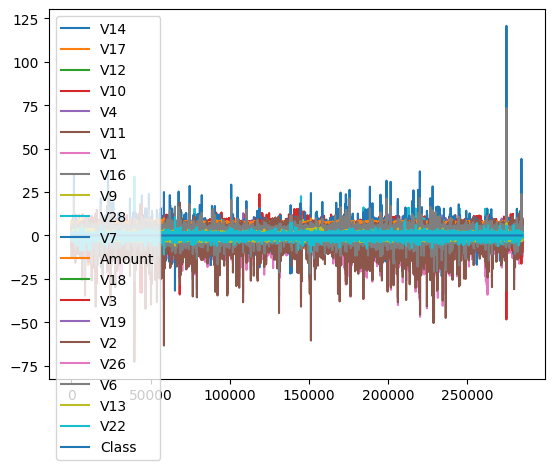

In [6]:
# # 정상 데이터 시각화
# df[df['Class']==0].plot()

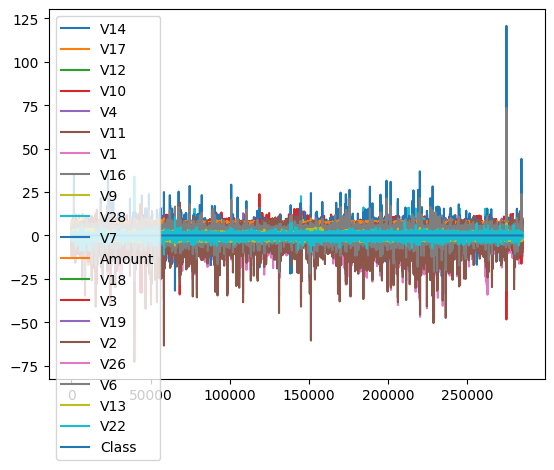

<AxesSubplot: >

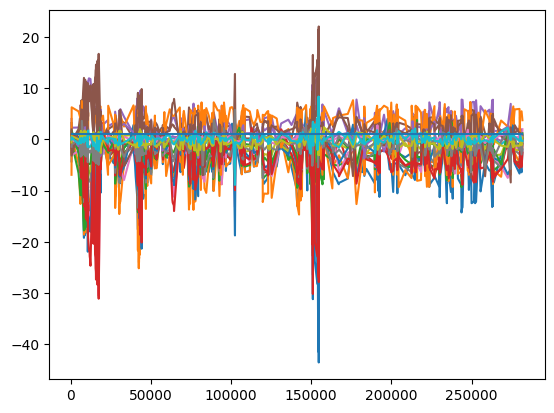

In [7]:
# # 사기 데이터 시각화
# df[df['Class']==1].plot(legend=False)

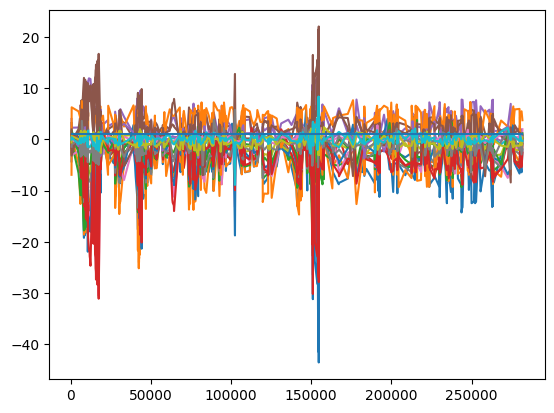

# 데이터, 라벨 분리

In [8]:
features = df.drop(['Class'], axis=1).values
labels = np.array(df.pop('Class'))

In [9]:
n_features = features.shape[1]

# 시퀀스 data 생성

In [10]:
# 모델에서 사용하기 위해 생성된 훈련 시퀀스
def temporalize(X, y, timesteps):
    output_X = []
    output_y = []
    for i in range(len(X) - timesteps - 1):
        t = []
        for j in range(1, timesteps + 1):
            # Gather the past records upto the lookback period
            t.append(X[[(i + j + 1)], :])
        output_X.append(t)
        output_y.append(y[i + timesteps + 1])
    return np.squeeze(np.array(output_X)), np.array(output_y)

In [11]:
timesteps = 30

# Temporalize
x, y = temporalize(features, labels, timesteps)
print(x.shape) # (283695, 30, 15)

(284776, 30, 20)


# Train, Test 분리

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.5)

print(len(x_train))  # 70923
print(len(x_valid))  # 70924
print(len(x_test))   # 141848

71194
71194
142388


In [14]:
# For training the autoencoder, split 0 / 1
x_train_y0 = x_train[y_train == 0]
x_train_y1 = x_train[y_train == 1]

x_valid_y0 = x_valid[y_valid == 0]
x_valid_y1 = x_valid[y_valid == 1]

In [15]:
x_train_y0.shape

(71071, 30, 20)

# Standardize

In [16]:
def flatten(X):
    flattened_X = np.empty((X.shape[0], X.shape[2]))  # sample x features array.
    for i in range(X.shape[0]):
        flattened_X[i] = X[i, (X.shape[1]-1), :]
    return(flattened_X)

def scale(X, scaler):
    for i in range(X.shape[0]):
        X[i, :, :] = scaler.transform(X[i, :, :])
        
    return X

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(flatten(x_train_y0))

x_train_y0_scaled = scale(x_train_y0, scaler)
x_valid_scaled = scale(x_valid, scaler)
x_valid_y0_scaled = scale(x_valid_y0, scaler)
x_test_scaled = scale(x_test, scaler)

# LSTM Autoencoder model

In [18]:
model = Sequential()

model.add(LSTM(32, input_shape=(timesteps, n_features)))

model.add(Dropout(0.2))
model.add(RepeatVector(timesteps))
model.add(Dropout(0.2))

model.add(LSTM(32, return_sequences=True))
model.add(Dense(n_features))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                6784      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 repeat_vector (RepeatVector  (None, 30, 32)           0         
 )                                                               
                                                                 
 dropout_1 (Dropout)         (None, 30, 32)            0         
                                                                 
 lstm_1 (LSTM)               (None, 30, 32)            8320      
                                                                 
 dense (Dense)               (None, 30, 20)            660       
                                                        

# Train

In [19]:
epochs = 100
batch = 64 #128

In [20]:
%%time
history = model.fit(x_train_y0_scaled, x_train_y0_scaled,
                    epochs=epochs, batch_size=batch, validation_data=(x_valid_y0_scaled,x_valid_y0_scaled),
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, mode="min")])

Epoch 1/100
1111/1111 [==============================] - 32s 26ms/step - loss: 0.9608 - val_loss: 0.9452
Epoch 2/100
1111/1111 [==============================] - 27s 25ms/step - loss: 0.9445 - val_loss: 0.9397
Epoch 3/100
1111/1111 [==============================] - 28s 25ms/step - loss: 0.9407 - val_loss: 0.9372
Epoch 4/100
1111/1111 [==============================] - 28s 25ms/step - loss: 0.9387 - val_loss: 0.9355
Epoch 5/100
1111/1111 [==============================] - 28s 25ms/step - loss: 0.9387 - val_loss: 0.9358
Epoch 6/100
1111/1111 [==============================] - 28s 25ms/step - loss: 0.9372 - val_loss: 0.9342
Epoch 7/100
1111/1111 [==============================] - 27s 24ms/step - loss: 0.9360 - val_loss: 0.9317
Epoch 8/100
1111/1111 [==============================] - 27s 24ms/step - loss: 0.9347 - val_loss: 0.9301
Epoch 9/100
1111/1111 [==============================] - 27s 24ms/step - loss: 0.9337 - val_loss: 0.9299
Epoch 10/100
1111/1111 [==============================]

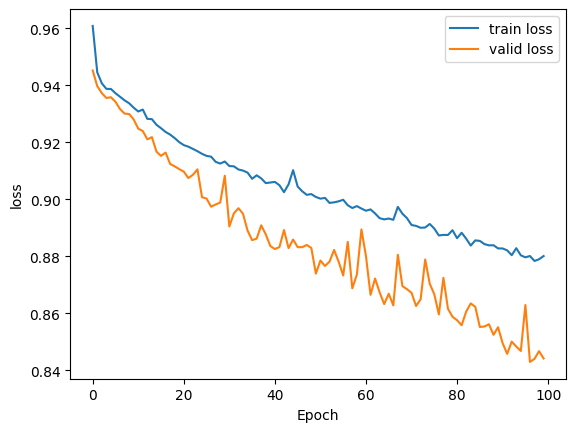

In [21]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='valid loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.show()

# Threshold

In [22]:
valid_x_predictions = model.predict(x_valid_scaled)
mse = np.mean(np.power(flatten(x_valid_scaled) - flatten(valid_x_predictions), 2), axis=1)

2225/2225 [==============================] - 13s 5ms/step


In [23]:
error_df = pd.DataFrame({'Reconstruction_error':mse, 
                         'True_class':list(y_valid)})
precision_rt, recall_rt, threshold_rt = metrics.precision_recall_curve(
    error_df['True_class'], error_df['Reconstruction_error'])

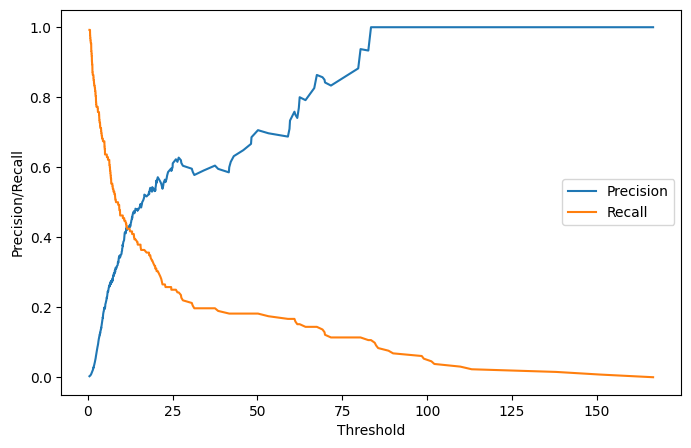

In [24]:
plt.figure(figsize=(8,5))
plt.plot(threshold_rt, precision_rt[1:], label='Precision')
plt.plot(threshold_rt, recall_rt[1:], label='Recall')
plt.xlabel('Threshold'); plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

In [25]:
# best position of threshold
index_cnt = [cnt for cnt, (p, r) in enumerate(zip(precision_rt, recall_rt)) if p==r][0]
print('precision: ',precision_rt[index_cnt],', recall: ',recall_rt[index_cnt])

# fixed Threshold
threshold_fixed = threshold_rt[index_cnt]
print('threshold: ',threshold_fixed)

precision:  0.42424242424242425 , recall:  0.42424242424242425
threshold:  12.20514268504961


# Test

In [26]:
test_x_predictions = model.predict(x_test_scaled)

4450/4450 [==============================] - 25s 6ms/step


In [27]:
mse = np.mean(np.power(flatten(x_test_scaled) - flatten(test_x_predictions), 2), axis=1)

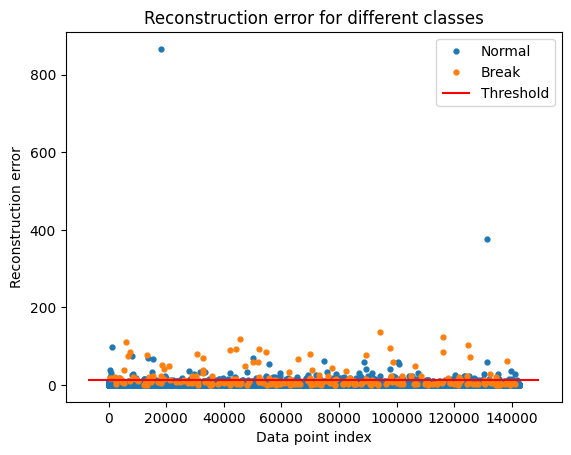

In [28]:
error_df = pd.DataFrame({'Reconstruction_error': mse,
                         'True_class': y_test.tolist()})

groups = error_df.groupby('True_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Break" if name == 1 else "Normal")
ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

# Evaluation

f1 score: 0.3312101910828026
Accuracy 0.9977877349214821
Precision 0.3333333333333333
Recall 0.3291139240506329


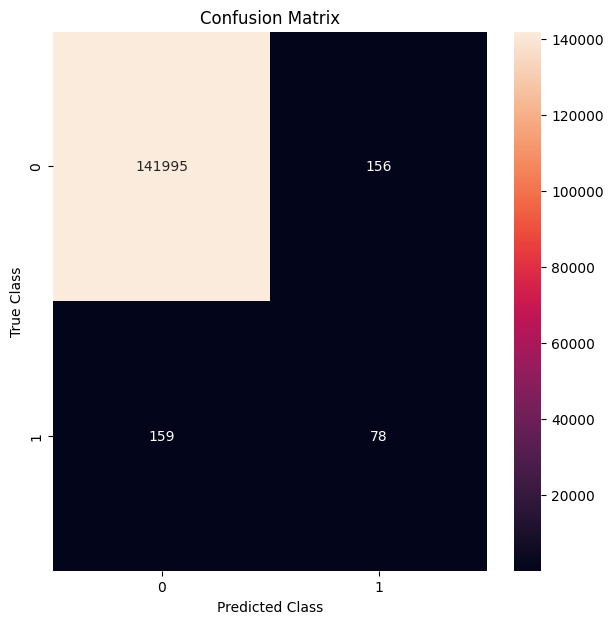

In [29]:
# classification by threshold
pred_y = [1 if e > threshold_fixed else 0 for e in error_df['Reconstruction_error'].values]

print("f1 score:", f1_score(error_df['True_class'], pred_y))
print("Accuracy", accuracy_score(error_df['True_class'], pred_y))
print("Precision", precision_score(error_df['True_class'], pred_y))
print("Recall", recall_score(error_df['True_class'], pred_y))
    
conf_matrix = metrics.confusion_matrix(error_df['True_class'], pred_y)
plt.figure(figsize=(7, 7))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class'); plt.ylabel('True Class')
plt.show()